# Predicting Boston Housing Prices


In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the https://www.kaggle.com/vikrishnan/boston-house-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_data = pd.read_csv("housing.csv",header = None,delimiter=r"\s+",  names = column_names)
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df_data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## What is the structure of the dataframe?

In [5]:
#Calling the .shape function to get the shape of the dataset
df_data.shape

(506, 14)

In [6]:
# calling the describe function
df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Missing or Null points

In [7]:
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

there is no missing value in dataset

In [9]:
df_data['target']=df_data.MEDV

In [10]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


## Exploration of dataset

In [11]:
# minimum price of tha data
minimum_pricce = df_data['target'].min()
# maximum price of data
maximum_price = df_data['target'].max()
# mean price of the data
mean_price = df_data['target'].mean()
# median price of the data
median_price = df_data['target'].median()
# standard deviation price of the data
std_price = df_data['target'].std()
#first_quartile = np.quantile(target, 25)
#third_quartile = np.quantile(target, 75)
#inter_quartile = third_quartile -  first_quartile

print("statistics for boston housing dataset: \n")
print("Minimum price: $",minimum_pricce)
print("Maximum price: $",maximum_price)
print("Mean price: $",mean_price)
print("Median price $",median_price)
print("Standard deviation of prices: $",std_price)
#print("First quartile of prices: $",first_quartile)
#print("Second quartile of prices: $",third_quartile)
#print("Interquartile (IQR) of prices: $",inter_quartile)

statistics for boston housing dataset: 

Minimum price: $ 5.0
Maximum price: $ 50.0
Mean price: $ 22.532806324110698
Median price $ 21.2
Standard deviation of prices: $ 9.19710408737982


some visualizations to understand the relationship of the target variable with other features.

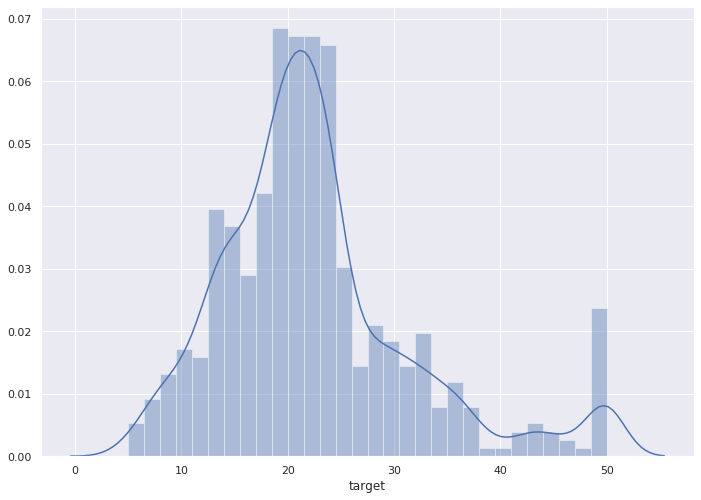

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_data['target'], bins = 30)
plt.show()

In [13]:
print(df_data[df_data['target'] == 50].shape)
df_data[df_data['target'] == 50]

(16, 15)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0,50.0


16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.



In [14]:
df_data = df_data[df_data['target'] != 50]
prices = df_data['target']
df_data.shape

(490, 15)

## Now we will examine the co relation of the features 

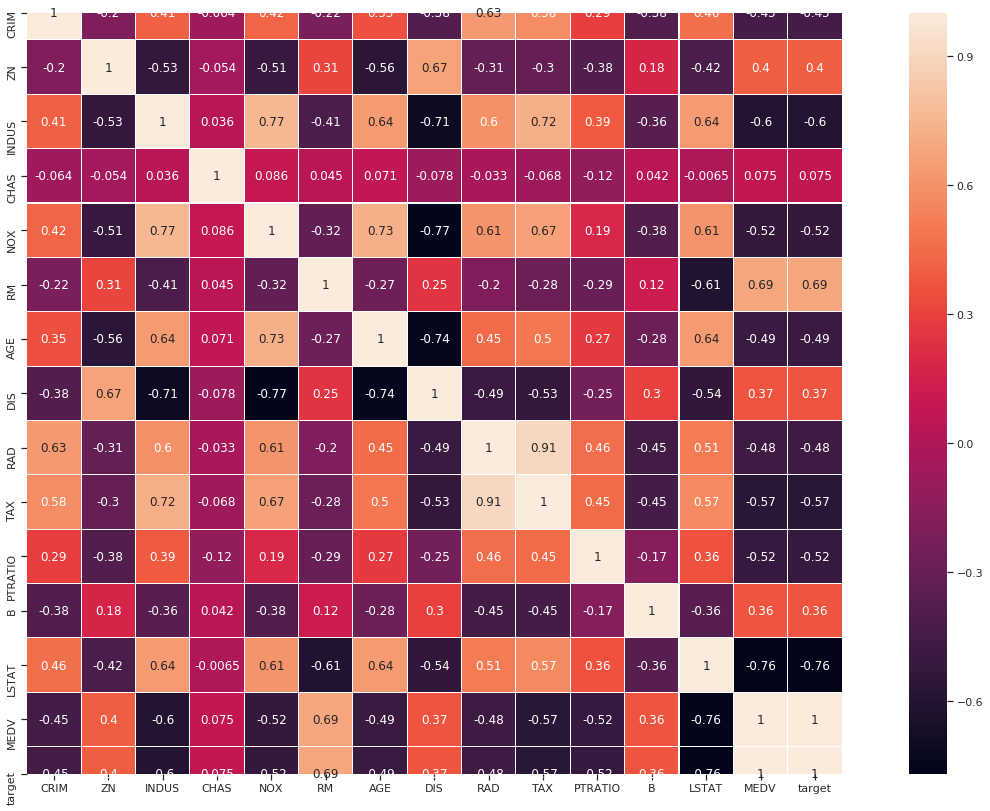

In [15]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(24, 14))
sns.heatmap(df_data.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

 heat map uses a warm-to-cool color spectrum to show dataset analytics, namely which parts of data receive the most attention.

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

#### Is there any relations among the features?

To fit a linear regression model, we select those features which have a high correlation with our target variable "target". By looking at the correlation matrix we can see that RM has a strong positive correlation with "target" (0.7) where as LSTAT has a high negative correlation with "target"(-0.74).
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.
####  Based on above observations we are only going to take top or best correlated features in the Dataframe,i.e 'RM', 'LSTAT', 'PTRATIO'. The remaining non-relevant features have been excluded.

In [16]:
filter_data=pd.DataFrame(df_data[['RM','LSTAT','PTRATIO','target']])
filter_data.head()

,RM,LSTAT,PTRATIO,target
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [17]:
features=filter_data.drop('target',axis=1)
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Plotting the graph for each including feature

In [18]:
features.columns

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.


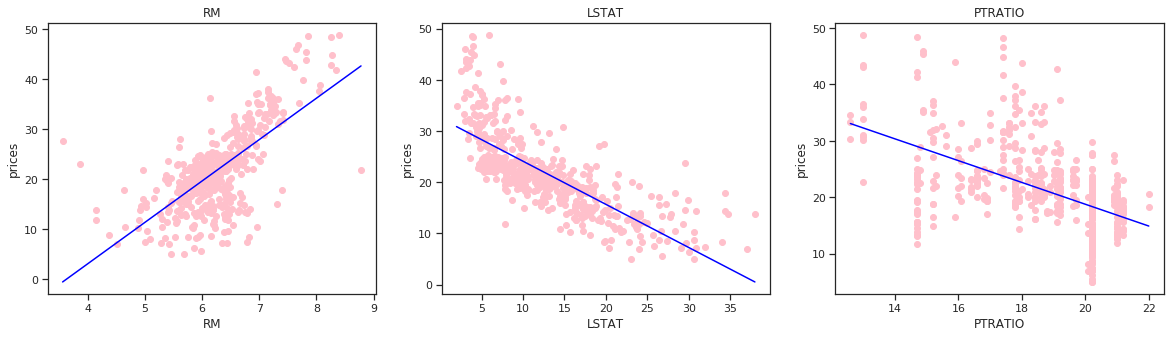

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = filter_data[col]
    y = prices
    plt.plot(x, y, 'o',color='pink')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='blue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

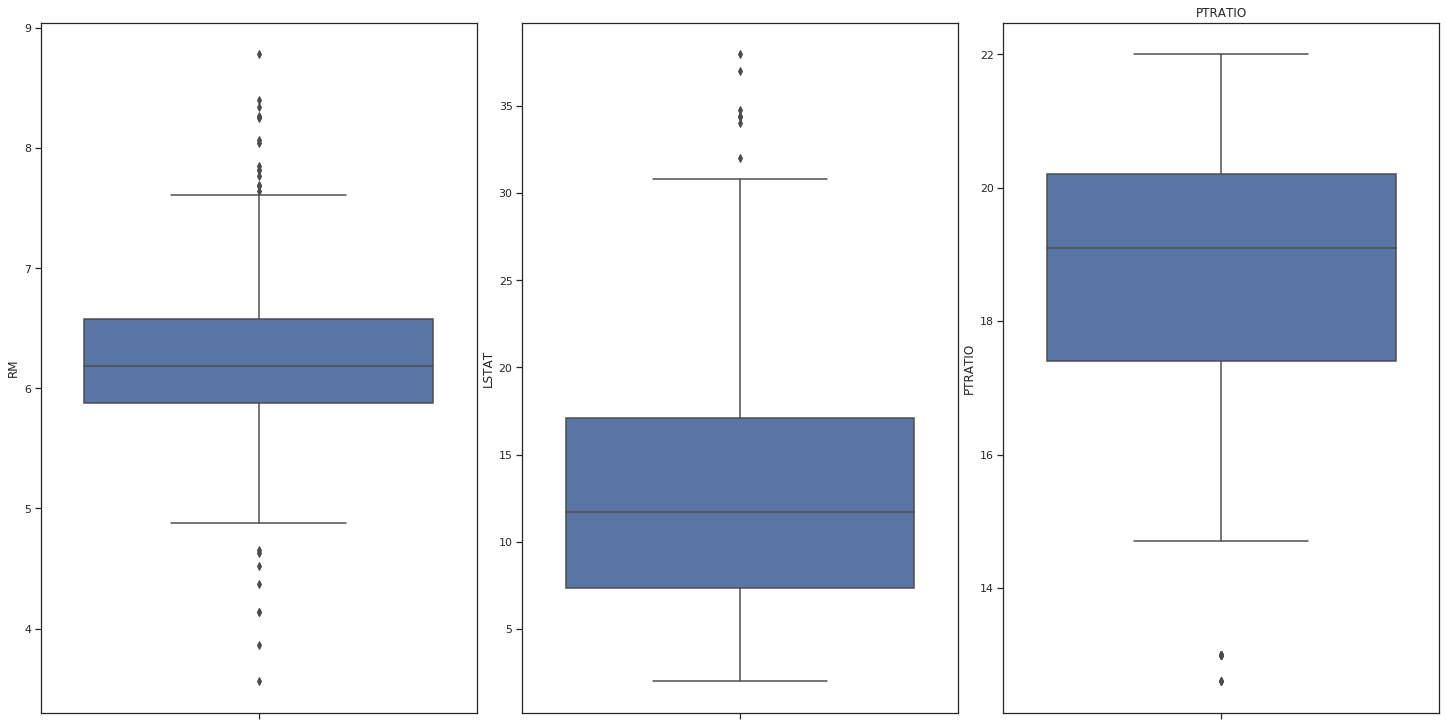

In [20]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in features.items():
    sns.boxplot(y=k, data=features, ax=axs[index])
    index += 1
    plt.title(k)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Features Observation Outcomes

1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.

1.RM

- For a higher RM, one would expect to observe a higher MEDV.

- his is because more rooms would imply more space, thereby costing more, taking all other factors constant.

2.LSTAT

- For a higher LSTAT, one would expect to observe a a lower MEDV.
- The social milieux in an area dominated by "lower class" citizens may not be conducive for young children. It may also be relatively unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would lower demand, hence lower prices.

3.PTRATIO

- For a higher LSTAT, one would expect to observe a lower MEDV.

- This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school. Typically this is the scenario in public/state schools compared to private schools. And the prices of houses around public schools are generally lower than those around private schools. Hence one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas

## Removing outliers

In [21]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(filter_data))
print(z)

[[0.50503976 1.12267925 1.52727975 0.3008782 ]
 [0.26901737 0.53477219 0.34150355 0.00457135]
 [1.43993368 1.25693687 0.34150355 1.66267415]
 ...
 [1.11961757 1.02940553 1.17628999 0.28815114]
 [0.84068201 0.91069353 1.17628999 0.04633691]
 [0.33023431 0.71284019 1.17628999 1.23909665]]


In [22]:
z.max()

4.114255740830087

In [23]:
print(np.where(z>3))

(array([141, 197, 217, 220, 224, 225, 225, 245, 253, 253, 270, 272, 353,
       354, 356, 357, 358, 358, 390, 396, 398]), array([1, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 1, 0, 1, 0, 1, 1]))


In [24]:
filtered_data = filter_data[(z < 3).all(axis=1)]

In [25]:
print(filtered_data.shape)
print(filter_data.shape)

(472, 4)
(490, 4)


In [26]:
print(filter_data[filter_data['RM']==8.78])

       RM  LSTAT  PTRATIO  target
364  8.78   5.29     20.2    21.9


In [27]:
print(filtered_data[filtered_data['RM']==8.78])

Empty DataFrame
Columns: [RM, LSTAT, PTRATIO, target]
Index: []


In [28]:
filtered_data.head()

,RM,LSTAT,PTRATIO,target
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [29]:
feature = filtered_data.drop('target', axis = 1) 
prices = filtered_data['target']

In [30]:
feature.shape, prices.shape

((472, 3), (472,))

## Model development for prediction

In this section, we are going to develop Machine learning Inbuilt Regression Model for the Prediction of the price of the House.



## Splitting the Dataframe into test and train

Take the Boston housing dataset and split the data into training and testing subsets.

Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset. We will split the dataset into 80% for Training of the Model, and 20% for the Testing.

Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.

In [31]:
x_train,x_test,y_train,y_test=train_test_split(feature,prices,random_state=42,test_size=0.2)


In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((377, 3), (377,), (95, 3), (95,))

## Regression Models

### 1 \. Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Calling the LinearRegression and saving it in object
lin_reg = LinearRegression()

#Inbuilt .fit function is used for the training
lin_reg.fit(x_train, y_train)

#Inbuilt .predict function is used for prediction
lin_reg_pred = lin_reg.predict(x_test)

# model evaluation for testing set
#We will evaluate our model using RMSE and R2-score.
acc_rf = r2_score(y_test, lin_reg_pred)

In [34]:
print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(acc_rf))

The model performance for testing set
--------------------------------------
R2 score is 0.7658983474988984


### 2. Random forest classifier

In [35]:
from sklearn.ensemble import RandomForestRegressor

#Calling the RandomForestRegressor and saving it in object
reg_2 = RandomForestRegressor(max_depth=10,max_leaf_nodes=23, random_state=42)

#Inbuilt .fit function is used for the training
reg_2.fit(x_train, y_train)

#Inbuilt .predict function is used for prediction
reg2_pred = reg_2.predict(x_test)

# model evaluation for testing set
#We will evaluate our model using RMSE and R2-score.
acc_rf = r2_score(y_test, reg2_pred)

/home/thunderbolt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


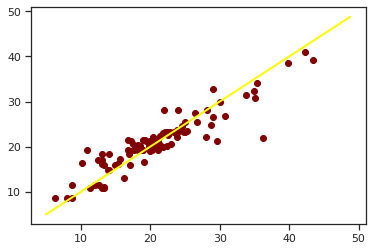

In [36]:
plt.scatter(y_test, reg2_pred,color='maroon')
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='yellow', lw=2)

In [37]:
print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(acc_rf))

The model performance for testing set
--------------------------------------
R2 score is 0.8315820381020734


## 3. Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

#Calling the LassoRegressor and saving it in object
reg_3 = Lasso(random_state=42)

#Inbuilt .fit function is used for the training
reg_3.fit(x_train, y_train)

#Inbuilt .predict function is used for prediction
y_pred = reg_3.predict(x_test)

# model evaluation for testing set
#We will evaluate our model using RMSE and R2-score.
acc_rf = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(acc_rf))

The model performance for testing set
--------------------------------------
R2 score is 0.6924310862020298


### Here we find that Boston Dataset is showing more Accurate Prediction with RandomForest Regression among the three that we have used

